## This notebook applies negative error probabilities using the Monte-Carlo sampling, where initial error probabilities are learned using Qiskit noise characterization. 

In [1]:
import pennylane as qml
import qutip as qt
# from qutip import qzero 
from qutip import *

import numpy as np
import matplotlib.pyplot as plt 

from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline

In [2]:
# N = 3
# J = np.zeros((N,N))
# edge_2q = ([]) 
# jp = [1, 0, 1]
# kas = 0 
# for i in range(N):
#     for j in range(N):
#         if j>i:
#             edge_2q.append((i,j))
#             # J[i][j] =np.round(np.random.uniform(-1,1),2) # Generating random J_ij accroding to the seed number
#             J[i][j] = jp[kas]
#             kas+=1

# print(edge_2q)
# print(jp)
# # print(edge_nn)

# n_wires = N
# graph = graph1 =edge_2q 
# dev = qml.device('default.qubit', wires=n_wires)

# print("Jij =",jp)

In [17]:
# pre-allocate operators (Pauli-X,-Y,-Z,-I)

N = 5
si = qt.qeye(2)
sx = qt.sigmax()
sy = qt.sigmay()
sz = qt.sigmaz()

si_list = []
sx_list = []     
sy_list = []
sz_list = []

op_list = []
for m in range(N):
    op_list.append(si)
    
si_list.append(qt.tensor(op_list))

for n in range(N):
    op_list = []
    for m in range(N):
        op_list.append(si)

    op_list[n] = sz
    sz_list.append(qt.tensor(op_list))


for n in range(N):
    op_list = []
    for m in range(N):
        op_list.append(si)

    op_list[n] = sy
    sy_list.append(qt.tensor(op_list))
    
for n in range(N):
    op_list = []
    
    for m in range(N):
        op_list.append(si)
        
    op_list[n] = sx
    sx_list.append(qt.tensor(op_list))

# H_ij = 0
# k = 0 
# for edge in edge_2q:
#     i = edge[0]
#     j = edge[1]
    
#     # interaction terms
#     H_ij += - 0.5 * ( jp[k] * si_list[0] - jp[k] * sz_list[i] * sz_list[j])
#     k+=1

# hp = (H_ij) # Problem Hamiltonian

# print("The eigenenergies are: ", hp.eigenstates()[0]) 
# print("The groundstate energy: ", hp.eigenstates()[0][0], hp.eigenstates()[0][1]) # Maxcut problems have degenerate eigenenergies
# gs_energy = hp.eigenstates()[0][0]
# print(gs_energy)

In [18]:
def fidelity_qutip(rho1, rho2):
    """
    Compute fidelity between two density matrices using Qutip.
    
    rho1, rho2: Qutip Qobj density matrices
    """
    return qt.fidelity(rho1, rho2)

In [19]:
def trace_qutip(rho1):

    '''Compute the '''

    rho_squared = rho1 * rho1

    # Compute the trace of rho^2    
    trace_rho_squared = rho_squared.tr()

    return trace_rho_squared

In [20]:
# gs = hp.eigenstates()[1][0]
# rh = gs*gs.dag()
# rh

In [21]:
# H_d = 0
# for i in range(N):
#     H_d+=sx_list[i]  # Local terms 

# # H_d

# def commutator(A, B):
#     """Returns the commutator [A, B] = AB - BA"""
#     return A * B - B * A 

# op = 1j * commutator(H_d, hp)
# qml.pauli_decompose(op.full())

psi0 = basis(2, 0)
a = destroy(2)
psi1 = a.dag()*psi0

# print(psi0, psi1)

plus = 1/np.sqrt(2) * (psi0 + psi1)

# init_state = tensor(plus, plus, plus)
# # init_state

In [22]:
dt = 0.07

times = np.arange(0.0, 10, dt)
len(times)

143

In [23]:
# Ep1 = []
# beta1 = [0]
# beta = 0
# # H_tot = [hp]
# rho = init_state
# states = [init_state]


# stepsss = 55

# aa = 1

# for i in range(stepsss):
#     H_tot_2 = hp + beta * H_d
#     # H_tot.append(H_tot_2)

#     result = mesolve(H_tot_2, rho, times[i:i+2], [], [op, hp])
#     result_states = sesolve(H_tot_2, rho, times[i:i+2])

#     rho = result_states.states[-1]
#     states.append(result_states.states[-1])

#     beta = - aa * result.expect[0][-1] 
#     beta1.append(- aa * result.expect[0][-1])
#     # print("Beta =",beta)
#     Ep1.append(result.expect[1][-1])
#     # print(result.expect[1])

In [24]:
times1 = np.insert(times, 0, 0)
print(times1)

[0.   0.   0.07 0.14 0.21 0.28 0.35 0.42 0.49 0.56 0.63 0.7  0.77 0.84
 0.91 0.98 1.05 1.12 1.19 1.26 1.33 1.4  1.47 1.54 1.61 1.68 1.75 1.82
 1.89 1.96 2.03 2.1  2.17 2.24 2.31 2.38 2.45 2.52 2.59 2.66 2.73 2.8
 2.87 2.94 3.01 3.08 3.15 3.22 3.29 3.36 3.43 3.5  3.57 3.64 3.71 3.78
 3.85 3.92 3.99 4.06 4.13 4.2  4.27 4.34 4.41 4.48 4.55 4.62 4.69 4.76
 4.83 4.9  4.97 5.04 5.11 5.18 5.25 5.32 5.39 5.46 5.53 5.6  5.67 5.74
 5.81 5.88 5.95 6.02 6.09 6.16 6.23 6.3  6.37 6.44 6.51 6.58 6.65 6.72
 6.79 6.86 6.93 7.   7.07 7.14 7.21 7.28 7.35 7.42 7.49 7.56 7.63 7.7
 7.77 7.84 7.91 7.98 8.05 8.12 8.19 8.26 8.33 8.4  8.47 8.54 8.61 8.68
 8.75 8.82 8.89 8.96 9.03 9.1  9.17 9.24 9.31 9.38 9.45 9.52 9.59 9.66
 9.73 9.8  9.87 9.94]


In [25]:
def coeff_beta(beta, t):
    return beta(t)

In [26]:
# Ep1_now = []
# rho = init_state
# # states = [init_state]
# gs*gs.dag()
# final_state = [init_state*init_state.dag()]
# beta1_now = [0, 0]
# h1_now = [0, 1]

# for i in range(1, 50):
#     beta_s = interp1d(times1[1:i+2], beta1_now, kind='linear', fill_value="extrapolate")
#     hamil_s = interp1d(times1[1:i+2], h1_now, kind='linear', fill_value="extrapolate")

#     H_tot_2 = [[hp, coeff_beta(hamil_s, times1[1:i+2])], [H_d, coeff_beta(beta_s, times1[1:i+2])]]

#     result = mesolve(H_tot_2, init_state, times1[1:i+2], [], [op, hp])
#     result_states = sesolve(H_tot_2, init_state, times1[1:i+2])

#     beta = - aa *result.expect[0][-1]
#     beta1_now.append(beta)
#     h1_now.append(1)

#     Ep1_now.append(result.expect[1][-1])
#     state = result_states.states[-1]
#     final_state.append(state*state.dag())


In [27]:
# succ_prob_Ep1_now = []
# for i in range(len(final_state)):
#     succ_prob_Ep1_now.append(fidelity_qutip(rh, final_state[i]))

## Open system 

In [28]:
# Input data
# Input data
data = [('IIIIY', 0.0), ('IIYII', 0.000495018435101417), ('IYIII', 0.0), ('IIIXY', 0.0), ('IIIYY', 0.0), ('IIZYI', 0.0009148370101589832), ('IXIII', 0.00010777432702382785), ('IYIXI', 0.0), ('IIXZI', 3.1545884368385507e-05), ('IIXII', 0.0006046326001171507), ('ZYIII', 0.0), ('IIIXI', 0.0006719327585057008), ('YYIII', 0.0), ('XIIII', 7.526607900406381e-05), ('XZIII', 0.0), ('IIXXI', 0.00036838238141547255), ('YXIII', 1.6817199893082228e-05), ('IZIXI', 0.0), ('IZIYI', 0.0), ('YIIII', 6.985366946050551e-05), ('IIZII', 0.0033398655383545996), ('ZIIII', 0.00011313873615702958), ('IIIZX', 0.0), ('IIIIX', 3.937691265307485e-06), ('ZZIII', 0.0), ('IIIYX', 0.0), ('IIIZZ', 5.825477241087637e-05), ('IIIZY', 0.00011872906295227361), ('IIIZI', 0.00041229446224651776), ('IIIYZ', 0.0), ('IIIXX', 1.635814222551901e-05), ('ZXIII', 7.466961284011499e-05), ('IZIII', 0.00030888065469906155), ('XXIII', 0.0), ('IXIZI', 0.0), ('IIXYI', 0.0), ('IIYZI', 6.780921625122265e-05), ('IIZZI', 0.0), ('IYIYI', 5.195981140560146e-05), ('XYIII', 1.6072548931333763e-05), ('YZIII', 2.3852560101057888e-05), ('IXIXI', 0.0), ('IIIIZ', 0.00048762385635260793), ('IIYYI', 0.0), ('IIIYI', 0.0012874721005326538), ('IYIZI', 0.0), ('IZIZI', 0.0001364588361555782), ('IIYXI', 0.0), ('IIIXZ', 0.0), ('IXIYI', 0.0), ('IIZXI', 0.0004380108606459997)]

# Mapping from characters to qutip operators
pauli_map = {
    "X": sx,
    "Y": sy,
    "Z": sz,
    "I": si
}

mf = 10
# Construct c_ops
c_ops = 0
for pauli_string, coeff in data:
    if coeff != 0:  # Skip zero coefficients
        operators = [pauli_map[char] for char in pauli_string]  # Map string to operators
        tensor_op = qt.tensor(operators)  # Create the tensor product
        c_ops = c_ops + np.sqrt(coeff*mf) * tensor_op
        # c_ops.append(np.sqrt(coeff) * tensor_op)
c_ops

Quantum object: dims=[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2]], shape=(32, 32), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 0.46708271+0.j          0.0062751 -0.03445708j  0.14815389-0.20911394j
  ...  0.        +0.j          0.        +0.j
   0.        +0.j        ]
 [ 0.0062751 +0.03445708j  0.27915053+0.j          0.0127899 +0.j
  ...  0.        +0.j          0.        +0.j
   0.        +0.j        ]
 [ 0.14815389+0.20911394j  0.0127899 +0.j          0.21650967+0.j
  ...  0.        +0.j          0.        +0.j
   0.        +0.j        ]
 ...
 [ 0.        +0.j          0.        +0.j          0.        +0.j
  ... -0.33866239+0.j          0.0127899 +0.j
   0.01578912-0.01781972j]
 [ 0.        +0.j          0.        +0.j          0.        +0.j
  ...  0.0127899 +0.j         -0.25354191+0.j
   0.0062751 +0.03445708j]
 [ 0.        +0.j          0.        +0.j          0.        +0.j
  ...  0.01578912+0.01781972j  0.0062751 -0.03445708j
  -0.34492999+0.j        ]]

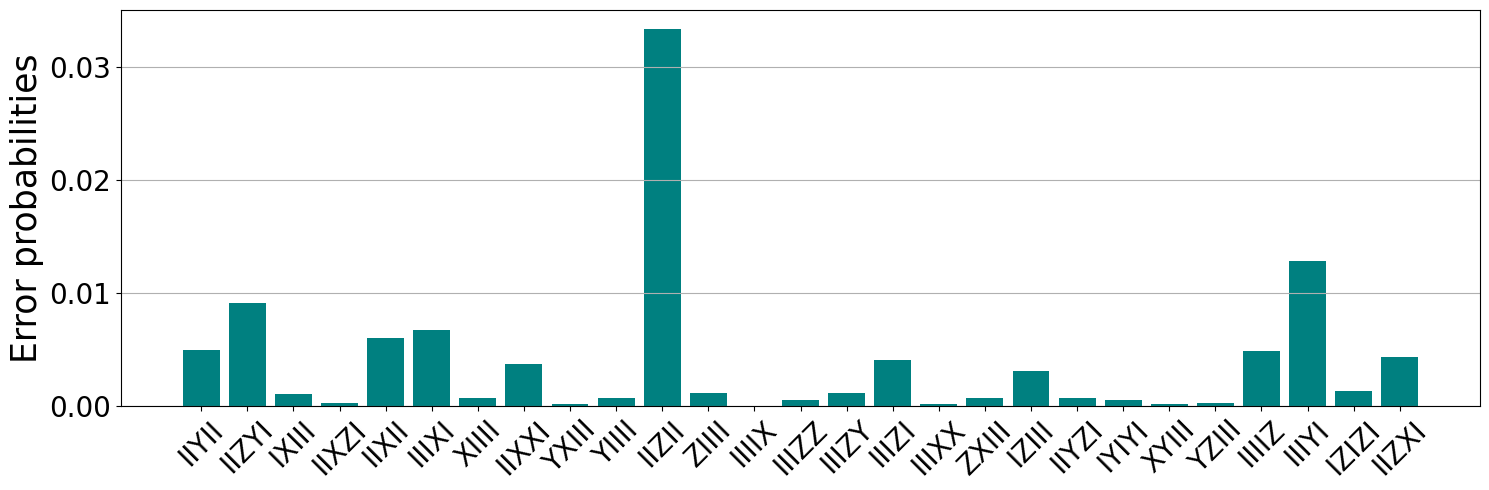

In [29]:
values=[]
for pauli, coeff in data:
    if coeff!=0:
        values.append(mf * coeff)

labels=[]
for pauli, coeff in data:
    if coeff!=0:
        labels.append(str(pauli))

fig, ax = plt.subplots(figsize=(15, 5))
# fig = plt.figure(figsize=(25, 10))
# ax_bar = fig.add_axes([0.02, 0.05, 0.3, 0.3])  # Precise position
# labels, values = generate_pauli_noise_data()
ax.bar(labels, values, color="teal")
# ax.set_title("Stochastic Pauli noise channels", fontsize=10)
ax.set_ylabel("Error probabilities", fontsize=25)
# ax.set_xlabel("Stochastic Pauli noise channels", fontsize=15)
ax.tick_params(axis='x', labelsize=20, labelrotation=45)
ax.tick_params(axis='y', labelsize=20)
ax.grid(axis='y')
plt.tight_layout()
# plt.savefig('lambda_coeff.pdf')
# plt.grid()


In [30]:
# Input SparsePauliOp
pauli_strings = ['IIIII', 'ZZIII', 'IZZII', 'IIZZI', 'IIIZZ']
coeffs = [-2.0 + 0.j, 0.5 + 0.j, 0.5 + 0.j, 0.5 + 0.j, 0.5 + 0.j]

# Convert SparsePauliOp to QuTiP operator
hp_qutip_op = 0
for pauli_string, coeff in zip(pauli_strings, coeffs):
    # Map string to operators
    operators = [pauli_map[char] for char in pauli_string]
    # Create the tensor product
    tensor_op = qt.tensor(*operators)
    # Multiply by the coefficient and add to the final operator
    hp_qutip_op += coeff.real * tensor_op

# Display the resulting operator
(hp_qutip_op)

Quantum object: dims=[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2]], shape=(32, 32), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0. -1.  0. ...  0.  0.  0.]
 [ 0.  0. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  0.  0.]
 [ 0.  0.  0. ...  0. -1.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]

In [31]:
# Input SparsePauliOp
pauli_strings = ['YZIII', 'ZYIII', 'IYZII', 'IZYII', 'IIYZI', 'IIZYI', 'IIIYZ', 'IIIZY']
coeffs = [1.0 + 0.j, 1.0 + 0.j, 1.0 + 0.j, 1.0 + 0.j, 1.0 + 0.j, 1.0 + 0.j, 1.0 + 0.j, 1.0 + 0.j]

op_qutip_op = 0
for pauli_string, coeff in zip(pauli_strings, coeffs):
    # Map string to operators
    operators = [pauli_map[char] for char in pauli_string]
    # Create the tensor product
    tensor_op = qt.tensor(*operators)
    # Multiply by the coefficient and add to the final operator
    op_qutip_op += coeff.real * tensor_op

# Display the resulting operator
(op_qutip_op)

Quantum object: dims=[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2]], shape=(32, 32), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0.+0.j 0.-1.j 0.-2.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+1.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+2.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+2.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+1.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.-2.j 0.-1.j 0.+0.j]]

In [32]:
# Input SparsePauliOp
pauli_strings = ['XIIII', 'IXIII', 'IIXII', 'IIIXI', 'IIIIX']
coeffs = [1 + 0.j, 1 + 0.j, 1 + 0.j, 1 + 0.j, 1 + 0.j]

# Convert SparsePauliOp to QuTiP operator
hd_qutip_op = 0
for pauli_string, coeff in zip(pauli_strings, coeffs):
    # Map string to operators
    operators = [pauli_map[char] for char in pauli_string]
    # Create the tensor product
    tensor_op = qt.tensor(*operators)
    # Multiply by the coefficient and add to the final operator
    hd_qutip_op += coeff.real * tensor_op

# Display the resulting operator
(hd_qutip_op)

Quantum object: dims=[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2]], shape=(32, 32), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0. 1. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 1. 0.]]

In [33]:
gs_energy_qutip_op = hp_qutip_op.eigenstates()[0][0]
print(gs_energy_qutip_op)
gs_qutip_op = hp_qutip_op.eigenstates()[1][0]
rh_qutip_op = gs_qutip_op*gs_qutip_op.dag() 
init_state = tensor(plus, plus, plus, plus, plus)
# rh_qutip_op

-4.0


In [35]:
Ep1_now = []
rho = init_state
states = [init_state]
beta1_now = [0, 0]
final_state = [init_state*init_state.dag()]
h1_now = [0, 1]
stepsss = 50

aa = 1

for i in range(1, stepsss):
    beta_s = interp1d(times1[1:i+2], beta1_now, kind='linear', fill_value="extrapolate")
    hamil_s = interp1d(times1[1:i+2], h1_now, kind='linear', fill_value="extrapolate")

    H_tot_2 = [[hp_qutip_op, coeff_beta(hamil_s, times1[1:i+2])], [hd_qutip_op, coeff_beta(beta_s, times1[1:i+2])]]

    result = mesolve(H_tot_2, init_state, times1[1:i+2], [], [op_qutip_op, hp_qutip_op])
    result_states = mesolve(H_tot_2, init_state, times1[1:i+2], [], [])

    beta = - aa * result.expect[0][-1] 
    beta1_now.append(beta)
    h1_now.append(1)
    Ep1_now.append(result.expect[1][-1])

    state = result_states.states[-1]
    final_state.append(state*state.dag())

In [36]:
r_now = []
for i in range(len(Ep1_now)):
    r_now.append(Ep1_now[i]/gs_energy_qutip_op)
# app_ratio.append(np.array(r))

succ_prob_Ep1_now = []
for i in range(len(final_state)):
    succ_prob_Ep1_now.append(fidelity_qutip(rh_qutip_op, final_state[i]))

In [37]:
Ep_now_open = []
rho = init_state
states = [init_state]
beta1_now_open = [0, 0]
h1_now = [0, 1]

final_state_open = [init_state*init_state.dag()]

for i in range(1, stepsss):
    beta_s = interp1d(times1[1:i+2], beta1_now_open, kind='linear', fill_value="extrapolate")
    hamil_s = interp1d(times1[1:i+2], h1_now, kind='linear', fill_value="extrapolate")

    H_tot_2 = [[hp_qutip_op, coeff_beta(hamil_s, times1[1:i+2])], [hd_qutip_op, coeff_beta(beta_s, times1[1:i+2])]]

    result = mesolve(H_tot_2, init_state, times1[1:i+2], c_ops, [op_qutip_op, hp_qutip_op])
    result_states = mesolve(H_tot_2, init_state, times1[1:i+2], c_ops, [])

    beta = - aa * result.expect[0][-1] 
    beta1_now_open.append(beta)
    h1_now.append(1)
    Ep_now_open.append(result.expect[1][-1])

    state = result_states.states[-1]
    final_state_open.append(state*state.dag())

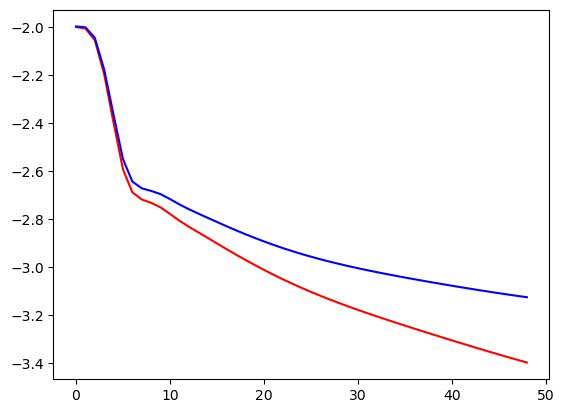

In [38]:
plt.plot(Ep1_now, 'r') 
plt.plot(Ep_now_open, 'b') 


In [48]:
succ_prob_Ep_now_open = []
for i in range(len(final_state_open)):
    succ_prob_Ep_now_open.append(fidelity_qutip(rh_qutip_op, final_state_open[i]))

r_now_open = []
for i in range(len(Ep_now_open)):
    r_now_open.append(Ep_now_open[i]/gs_energy_qutip_op)

purity = []
for i in range(len(final_state_open)):
    purity.append(trace_qutip(final_state_open[i]))

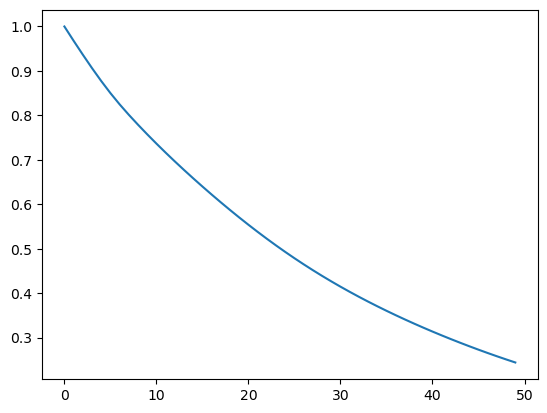

In [49]:
plt.plot(purity)

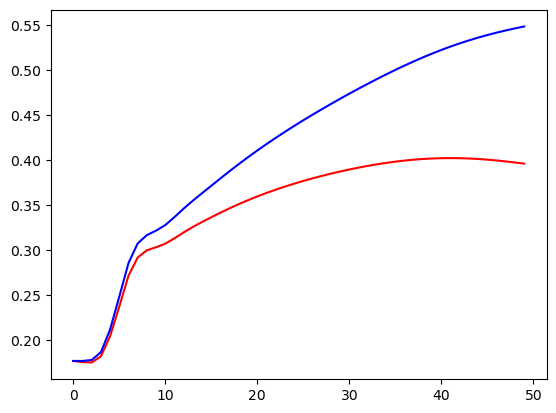

In [50]:
plt.plot(succ_prob_Ep_now_open,'r')
plt.plot(succ_prob_Ep1_now,'b') 

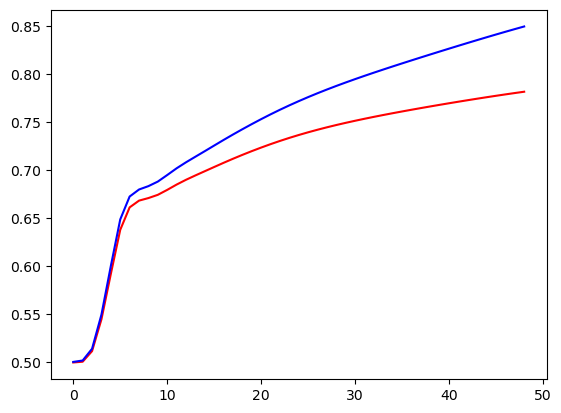

In [51]:
plt.plot(r_now_open,'r')
plt.plot(r_now,'b')

In [52]:
dt 

0.07

### Open system with Lyapunov controlled gamma rates 

In [53]:
for pauli_string, coeff in data:
    if coeff != 0:  # Skip zero coefficients
        print(pauli_string, coeff)

IIYII 0.000495018435101417
IIZYI 0.0009148370101589832
IXIII 0.00010777432702382785
IIXZI 3.1545884368385507e-05
IIXII 0.0006046326001171507
IIIXI 0.0006719327585057008
XIIII 7.526607900406381e-05
IIXXI 0.00036838238141547255
YXIII 1.6817199893082228e-05
YIIII 6.985366946050551e-05
IIZII 0.0033398655383545996
ZIIII 0.00011313873615702958
IIIIX 3.937691265307485e-06
IIIZZ 5.825477241087637e-05
IIIZY 0.00011872906295227361
IIIZI 0.00041229446224651776
IIIXX 1.635814222551901e-05
ZXIII 7.466961284011499e-05
IZIII 0.00030888065469906155
IIYZI 6.780921625122265e-05
IYIYI 5.195981140560146e-05
XYIII 1.6072548931333763e-05
YZIII 2.3852560101057888e-05
IIIIZ 0.00048762385635260793
IIIYI 0.0012874721005326538
IZIZI 0.0001364588361555782
IIZXI 0.0004380108606459997


In [54]:
# Construct c_ops
# c_ops = 0
OPS = []
gamma_coeffs = []
pauli_strings = []

for pauli_string, coeff in data:
    if coeff != 0:  # Skip zero coefficients
        operators = [pauli_map[char] for char in pauli_string]  # Map string to operators
        tensor_op = qt.tensor(operators)  # Create the tensor product
        second_lyapunov = tensor_op.dag() * hp_qutip_op * tensor_op - hp_qutip_op
        OPS.append(second_lyapunov)
        gamma_coeffs.append(coeff*mf)
        pauli_strings.append(tensor_op)
        
OPS[0]

Quantum object: dims=[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2]], shape=(32, 32), type='oper', dtype=CSR, isherm=True
Qobj data =
[[-2.  0.  0. ...  0.  0.  0.]
 [ 0. -2.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0. -2.  0.]
 [ 0.  0.  0. ...  0.  0. -2.]]

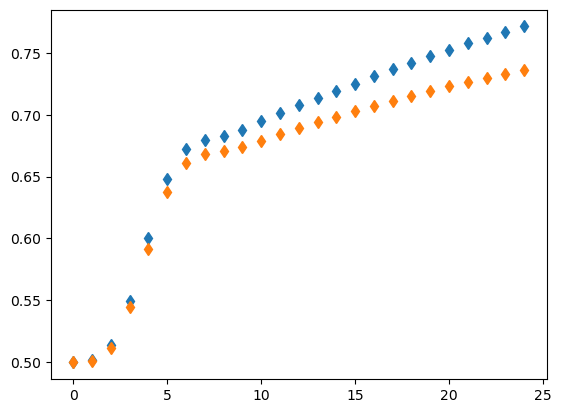

In [55]:
k = 25
plt.plot(r_now[0:k],'d')
plt.plot(r_now_open[0:k],'d')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


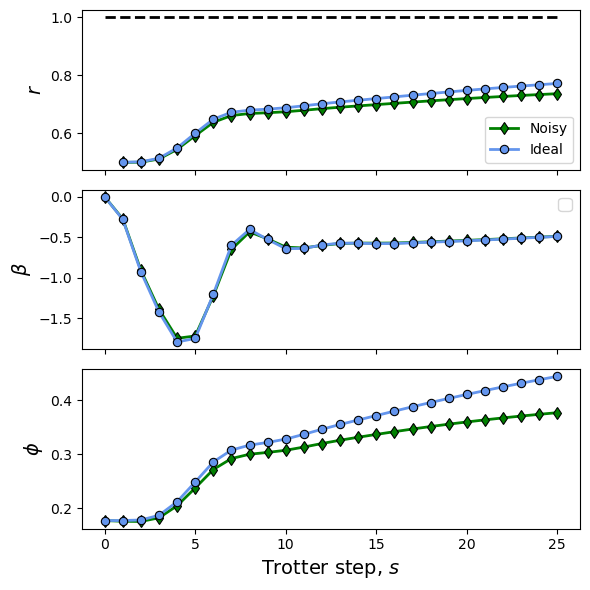

In [47]:
fig, axes = plt.subplots(3, 1, figsize=(6, 6), sharex=True)

k = 25
x= np.arange(1, k+1)

axes[0].plot(x, r_now_open[0:k], color = 'g', marker = 'd', linestyle='-', linewidth=2, markeredgewidth=0.8, markeredgecolor='black', label = 'Noisy')
axes[0].plot(x, r_now[0:k], color = '#6495ED', marker = 'o', linestyle='-', linewidth=2, markeredgewidth=0.8, markeredgecolor='black', label = 'Ideal')
axes[0].plot([1]*(k+1),linestyle='--', linewidth=2, color = 'black')
# axes[0].plot(tr)
axes[0].set_ylabel(r"$r$", fontsize=14)
axes[0].legend(fontsize=10, loc = 'lower right')
axes[0].tick_params(axis='x', labelsize=15)
# axes[0].legend()
# axes[0].text(2.4, 0.73, "(a)", fontsize=10, fontweight='bold')

axes[1].plot(beta1_now_open[1:k+2], color = 'g', marker = 'd', linestyle='-', linewidth=2, markeredgewidth=0.8, markeredgecolor='black')
axes[1].plot(beta1_now[1:k+2], color = '#6495ED', marker = 'o', linestyle='-', linewidth=2, markeredgewidth=0.8, markeredgecolor='black')
axes[1].legend(fontsize=12)
axes[1].set_ylabel(r"$\beta$", fontsize=14)
# axes[1].text(2.4, -0.35, "(b)", fontsize=10, fontweight='bold')


k = 26
axes[2].plot(succ_prob_Ep_now_open[0:k], color = 'g', marker = 'd', linestyle='-', linewidth=2, markeredgewidth=0.8, markeredgecolor='black', label = 'Open quantum system')
axes[2].plot(succ_prob_Ep1_now[0:k], color = '#6495ED', marker = 'o', linestyle='-', linewidth=2, markeredgewidth=0.8, markeredgecolor='black', label = 'Closed quatum system')
# axes[2].plot([1]*21,linestyle='--', linewidth=2, color = 'black')
# axes[2].legend()
axes[2].set_ylabel(r"$\phi$",fontsize=14)
axes[2].set_xlabel(r"Trotter step, $s$", fontsize=14)
# axes[2].text(2.4, 0.38, "(c)", fontsize=10, fontweight='bold')

plt.tight_layout()
# filename = f"Maxcut_5q.pdf"  # Creates "plot_experiment1.png"
# filename = f"Plot1_dt_0.05_mf_5_ntraj_3000_type1_steps40.pdf"
# plt.savefig(filename)
plt.show()


In [1179]:
dt

0.07

In [ ]:
k = 25
kasturi = [r_now_open[0:k], r_now[0:k]]
# file_path = f'data_5q/r_mf_{mf}_dt_{dt}_fqa.npy'  
file_path = f'data_5q/r_beta_{aa}_mf_{mf}_dt_{dt}_fqa.npy'  

# Write the array to a file
np.save(file_path, kasturi)

In [1181]:
k = k+1

kasturi = [succ_prob_Ep_now_open[0:k], succ_prob_Ep1_now[0:k]]
# file_path = f'data_5q/phi_mf_{mf}_dt_{dt}_fqa.npy'
file_path = f'data_5q/phi_beta_{aa}_mf_{mf}_dt_{dt}_fqa.npy'


# Write the array to a file
np.save(file_path, kasturi)

In [1182]:
k = k+1
kasturi = [beta1_now_open[1:k], beta1_now[1:k]]
# file_path = f'data_5q/beta_mf_{mf}_dt_{dt}_fqa.npy'
file_path = f'data_5q/beta_beta_{aa}_mf_{mf}_dt_{dt}_fqa.npy'


# Write the array to a file
np.save(file_path, kasturi)

In [1183]:
kasturi = [purity]
# file_path = f'data_5q/purity_mf_{mf}_dt_{dt}_fqa.npy'
file_path = f'data_5q/purity_beta_{aa}_mf_{mf}_dt_{dt}_fqa.npy'
np.save(file_path, kasturi)

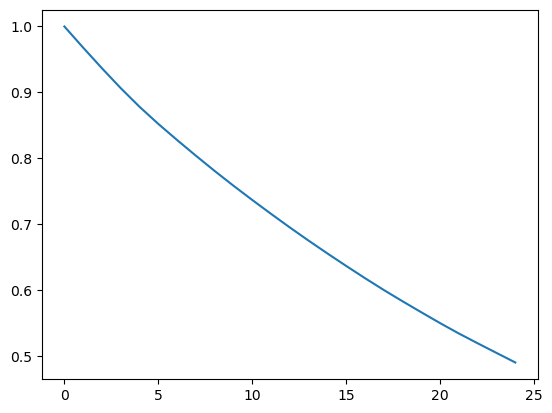

In [1184]:
plt.plot(purity[0:25])

## LOAD FILES AND PLOT

## Plot as a function of time 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


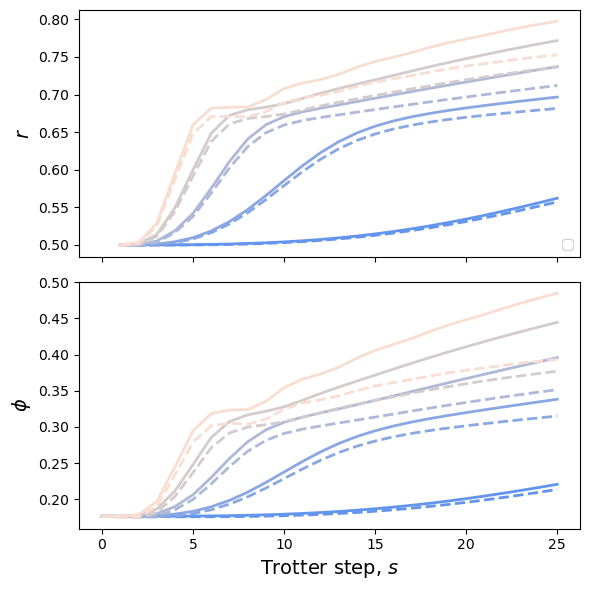

In [1186]:
mf = 10
dt = 0.07

cases = [0.01, 0.03, 0.05, 0.07, 0.09]
colors = ['#6495ED', '#89A7E2', '#AEB9D7', '#D3CBCC', '#F8DED1', '#F6BDC0']
# colors = ['blue', 'orange', 'g', 'purple', 'olive']


fig, axes = plt.subplots(2, 1, figsize=(6, 6), sharex=True)

for i, dt in enumerate(cases):

    file_path = f'data_5q/r_mf_{mf}_dt_{dt}_fqa.npy'  
    agp_arr = np.load(file_path)

    r_now_open, r_now = agp_arr[0], agp_arr[1]

    file_path = f'data_5q/phi_mf_{mf}_dt_{dt}_fqa.npy'
    agp_arr3 = np.load(file_path)
    
    succ_prob_Ep_now_open, succ_prob_Ep1_now = agp_arr3[0], agp_arr3[1]

    file_path = f'data_5q/beta_mf_{mf}_dt_{dt}_fqa.npy'
    agp_arr2 = np.load(file_path)
    beta1_now_open, beta1_now = agp_arr2[0], agp_arr2[1]

    k = 25
    x= np.arange(1, k+1)

    axes[0].plot(x, r_now_open[0:k], color = colors[i], linestyle='--', linewidth=2, markeredgewidth=0.8, markeredgecolor='black')
    axes[0].plot(x, r_now[0:k], color = colors[i], linestyle='-', linewidth=2, markeredgewidth=0.8, markeredgecolor='black')
    # axes[0].plot(tr)
    axes[0].set_ylabel(r"$r$", fontsize=14)
    axes[0].legend(fontsize=10, loc = 'lower right')
    axes[0].tick_params(axis='x', labelsize=15)
    # axes[0].legend()
    # axes[0].text(2.4, 0.73, "(a)", fontsize=10, fontweight='bold')

    k = 26
    axes[1].plot(succ_prob_Ep_now_open[0:k], color = colors[i], linestyle='--', linewidth=2, markeredgewidth=0.8, markeredgecolor='black', label = 'Open quantum system')
    axes[1].plot(succ_prob_Ep1_now[0:k], color = colors[i], linestyle='-', linewidth=2, markeredgewidth=0.8, markeredgecolor='black', label = 'Closed quatum system')
    # axes[2].plot([1]*21,linestyle='--', linewidth=2, color = 'black')
    # axes[2].legend()
    axes[1].set_ylabel(r"$\phi$",fontsize=14)
    axes[1].set_xlabel(r"Trotter step, $s$", fontsize=14)
    # axes[2].text(2.4, 0.38, "(c)", fontsize=10, fontweight='bold')

plt.tight_layout()
# filename = f"demo_2.pdf" 
# plt.savefig(filename)
plt.show()


/var/folders/tf/62nqm_vs3x14pkb9r6tp4llc0000gn/T/ipykernel_11810/3527929955.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


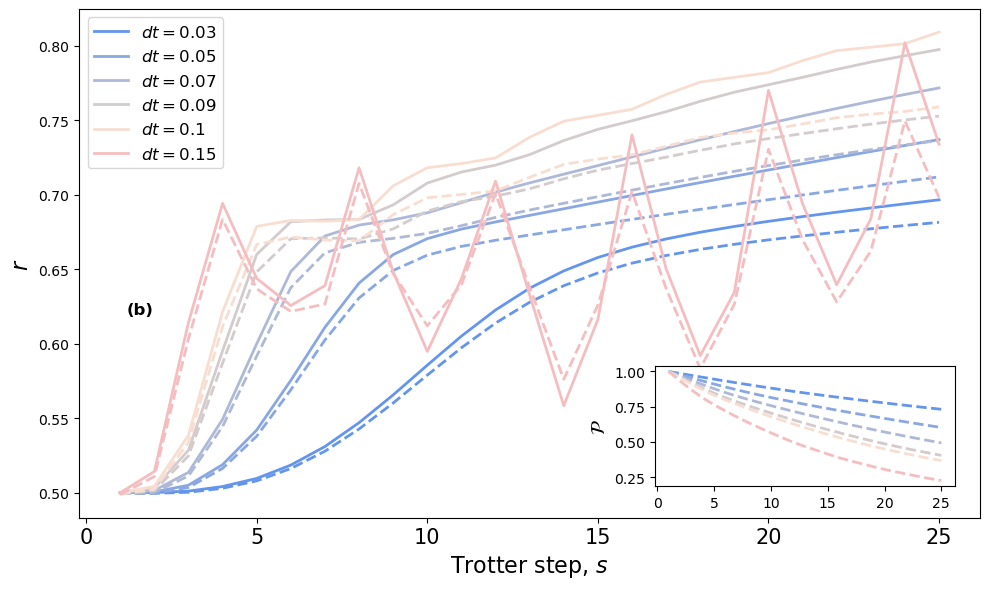

In [1270]:
mf = 10
dt = 0.07

cases = [0.03, 0.05, 0.07, 0.09, 0.1, 0.15]
colors = ['#6495ED', '#89A7E2', '#AEB9D7', '#D3CBCC', '#F8DED1', '#F6BDC0']
# colors = ['blue', 'orange', 'g', 'purple', 'olive']

fig, axes = plt.subplots(figsize=(10, 6))
# Create inset
inset_ax = fig.add_axes([0.66, 0.18, 0.3, 0.2])  # x, y, width, height

for i, dt in enumerate(cases):

    file_path = f'data_5q/r_mf_{mf}_dt_{dt}_fqa.npy'  
    agp_arr = np.load(file_path)

    r_now_open, r_now = agp_arr[0], agp_arr[1]

    file_path = f'data_5q/phi_mf_{mf}_dt_{dt}_fqa.npy'  
    agp_arr3 = np.load(file_path)
    
    succ_prob_Ep_now_open, succ_prob_Ep1_now = agp_arr3[0], agp_arr3[1]

    file_path = f'data_5q/purity_mf_{mf}_dt_{dt}_fqa.npy'
    purity1 = np.load(file_path)

    k = 25
    x= np.arange(1, k+1)
    axes.plot(x, r_now_open[0:k], color = colors[i], linestyle='--', linewidth=2, markeredgewidth=0.8, markeredgecolor='black')
    axes.plot(x, r_now[0:k], color = colors[i], linestyle='-', linewidth=2, markeredgewidth=0.8, markeredgecolor='black', label=rf"$dt = {dt} $")
    axes.set_ylabel(r"$r$", fontsize=16)
    axes.legend(fontsize=12, loc = 'upper left')
    axes.tick_params(axis='x', labelsize=15)
    axes.set_xlabel(r"Trotter step, $s$", fontsize=16)

    # inset_ax = inset_axes(axes, width="35%", height="30%", loc='lower right')
    inset_ax.plot(x, purity1[0][0:k], color = colors[i],  linestyle='--', linewidth=2, markeredgewidth=0.8)
    
inset_ax.set_ylabel(r"$\mathcal{P}$", fontsize=14)
inset_ax.tick_params(axis='x', labelsize=10)

axes.text(1.2, 0.62, "(b)", fontsize=12, fontweight='bold')




plt.tight_layout()
filename = f"change_dt.pdf" 
plt.savefig(filename)
plt.show()


In [1252]:
len(r_now_open[0:k])

25

In [1251]:
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25])

## Plot as a function of beta 

/var/folders/tf/62nqm_vs3x14pkb9r6tp4llc0000gn/T/ipykernel_11810/3530786996.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


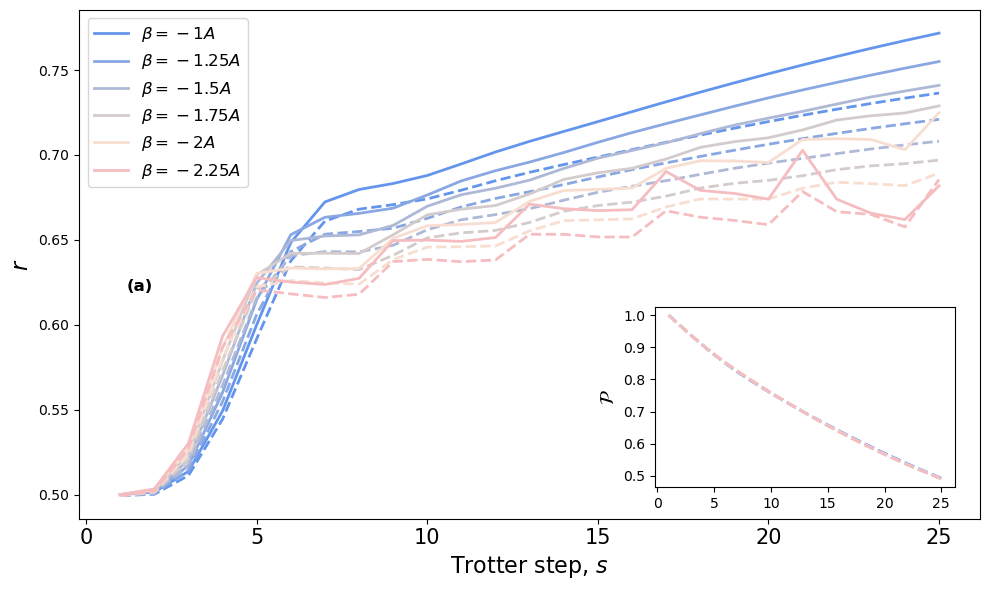

In [1271]:
mf = 10
dt = 0.07

cases = [1, 1.25,1.5, 1.75, 2, 2.25]
colors = ['#6495ED', '#89A7E2', '#AEB9D7', '#D3CBCC', '#F8DED1', '#F6BDC0']
# colors = ['blue', 'orange', 'g', 'purple', 'olive']

fig, axes = plt.subplots(figsize=(10, 6))

# Create inset
inset_ax = fig.add_axes([0.66, 0.18, 0.3, 0.3])  # x, y, width, height

for i, aa in enumerate(cases):

    file_path = f'data_5q/r_beta_{aa}_mf_{mf}_dt_{dt}_fqa.npy'  
    agp_arr = np.load(file_path)

    r_now_open, r_now = agp_arr[0], agp_arr[1]

    file_path = f'data_5q/phi_beta_{aa}_mf_{mf}_dt_{dt}_fqa.npy'  
    agp_arr3 = np.load(file_path)
    
    succ_prob_Ep_now_open, succ_prob_Ep1_now = agp_arr3[0], agp_arr3[1]

    file_path = f'data_5q/purity_beta_{aa}_mf_{mf}_dt_{dt}_fqa.npy'
    purity1 = np.load(file_path)

    k = 25
    x= np.arange(1, k+1)
    axes.plot(x, r_now_open[0:k], color = colors[i], linestyle='--', linewidth=2, markeredgewidth=0.8, markeredgecolor='black')
    axes.plot(x, r_now[0:k], color = colors[i], linestyle='-', linewidth=2, markeredgewidth=0.8, markeredgecolor='black', label=rf"$\beta = -{aa} A $")
    axes.set_ylabel(r"$r$", fontsize=16)
    axes.legend(fontsize=12, loc = 'upper left')
    axes.tick_params(axis='x', labelsize=15)
    axes.set_xlabel(r"Trotter step, $s$", fontsize=16)

    # axes[0].plot(purity[0:k])

    # inset_ax = inset_axes(axes, width="35%", height="30%", loc='lower right')
    inset_ax.plot(x, purity1[0][0:k], color = colors[i], linestyle='--', linewidth=2, markeredgewidth=0.8)

inset_ax.set_ylabel(r"$\mathcal{P}$", fontsize=14)
inset_ax.tick_params(axis='x', labelsize=10)
axes.text(1.2, 0.62, "(a)", fontsize=12, fontweight='bold')



plt.tight_layout()
filename = f"change_beta.pdf" 
plt.savefig(filename)
plt.show()
